# 5.5 Results for outer-totalistic rules on random 3-regular graphs

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm

from src.population_dynamics import *
from utils.rules import *
import matplotlib.colors as mcolors
import pickle

#%matplotlib widget

%matplotlib inline

plt.rcParams.update({'backend': 'pdf', 'font.size': 14, 'font.family': 'serif', 'text.latex.preamble': r'\usepackage{gensymb}',  'savefig.format':'pdf', 
                     'lines.linewidth': 2, 'lines.markersize':10, 'lines.markeredgewidth':2, 'figure.constrained_layout.w_pad': 2, 'figure.autolayout' : True})

In [2]:
rules=generate_independent_OT_rules(d=3)

for rule in tqdm(rules[119:]):
    # print("\n\n==================== rule: "+str(rule)+" ===================")
    NA=AN(rule)
    NA.RS_and_1RSB()
    with open("results/1RSB_results_3_regular/"+str(rule), "wb") as file:
        pickle.dump(NA, file)

In [225]:
homo_messages=[np.array([[1.,0],[0,0]]), np.array([[0., 0],[0,1]]), np.array([[0.5, 0.5],[0,0]]), np.array([[0,0],[0.5,0.5]])]

In [226]:
number_homogeneous_configurations=np.zeros(len(rules), dtype=np.int8)
for i, rule in enumerate(rules):
    if rule[0]=='0' or rule[0]=='+':
        number_homogeneous_configurations[i]+=1
    if rule[-1]=='1' or rule[-1]=='+':
        number_homogeneous_configurations[i]+=1

In [251]:
locally_contradictory=[]
no_stationary=[]
only_homo=[]
subexp_no_homo=[]
subexp_homo=[]
exp_no_homo=[]
exp_homo=[]
for i in tqdm(range(len(rules))):
    with open("results/1RSB_results_3_regular/"+str(rules[i]), "rb") as file:
        AN=pickle.load(file)
    with open("results/RS_results_3_regular/"+str(rules[i]), "rb") as file:
        BP=pickle.load(file)
    string='['
    for k in range(len(AN.rule)):
        string+=AN.rule[k]+','
    string=string.rstrip(',')
    string+=']'
    string+=', '+str(AN.phase)+', '
    if AN.phase=='RS':
        string+='φ='+str(np.round(BP.phi,3))
    elif AN.phase=='d1RSB':
        string+='φ_RS='+str(np.round(BP.phi,3))+', ψ='+str(np.round(AN.SP.psi_mean,3))+', φ='+str(np.round(AN.SP.phi_mean,3))+', Σ='+str(np.round(AN.SP.complexity_mean,3))
    else:
        if np.max(AN.SP.complexity_list)<-1e-4:
            string+='φ_RS='+str(np.round(BP.phi,3))+', ψ='+str(np.round(AN.SP.psi_list[np.argmax(AN.SP.complexity_list)],3))+', φ='+str(np.round(AN.SP.phi_list[np.argmax(AN.SP.complexity_list)],3))+', Σ='+str(np.round(np.max(AN.SP.complexity_list),3))
        else:
            string+='φ_RS='+str(np.round(BP.phi,3))+', ψ_s='+str(np.round(AN.SP.phi_s,3))
            
        
    if AN.phase=='RS' or AN.phase=='d1RSB':
        if AN.BP.phi<-10:
            locally_contradictory.append(string)
        elif AN.BP.phi<-1e-10:
            no_stationary.append(string)
        elif np.abs(AN.BP.phi)<1e-10:
            num_homo=0
            num_phi_0=0
            for j in range(len(BP.all_phi)):
                if abs(BP.all_phi[j])<1e-10:
                    num_phi_0+=1
                if np.any(np.all(np.round(BP.fixed_points[j],1) == homo_messages, axis=(1,2))):
                    num_homo+=1
            
            if num_homo!=number_homogeneous_configurations[i]:
                print("Some homogeneous configuration was not found by BP for rule ", rules[i])
            if num_homo==len(BP.all_phi):
                only_homo.append(string)
            else:
                if num_phi_0>num_homo and num_homo>0:
                    subexp_homo.append(string)
                elif num_phi_0>num_homo and num_homo==0:
                    subexp_no_homo.append(string)
                else:
                    only_homo.append(string)          
        else:
            if number_homogeneous_configurations[i]>0:
                exp_homo.append(string)
            else:
                exp_no_homo.append(string)
    else:
        if AN.SP.phi_s<-10:
            locally_contradictory.append(string)
        elif AN.SP.phi_s<1e-10 or np.max(AN.SP.complexity_list)<0:
            no_stationary.append(string)
        elif np.abs(AN.SP.phi_s)<1e-10:
            print('Warning, cannot classify this !')
        else:
            if AN.rule[0]=='0' or AN.rule[0]=='+' or AN.rule[-1]=='1' or AN.rule[-1]=='+':
                exp_homo.append(string)   
            else:
                exp_no_homo.append(string)

100%|████████████████████████████████████████████████████████████████████████████████| 136/136 [00:08<00:00, 16.23it/s]


In [272]:
dic={'Locally contradictory':locally_contradictory, 'No stationary': no_stationary, 'only homogeneous': only_homo, 'subexponentially many no homogeneous': subexp_no_homo, 'subexponentially many with homogeneous': subexp_homo, 'exponentially many no homogeneous': exp_no_homo, 'exponentially many with homogeneous': exp_homo}

In [273]:
df=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dic.items() ]))

In [274]:
pd.options.display.max_colwidth = 1000

In [275]:
print(df[['Locally contradictory','No stationary', 'subexponentially many no homogeneous']].to_latex(index=False, caption='Classification of outer-totalistic CA in the RS case', longtable=False, na_rep=''))

\begin{table}
\centering
\caption{Classification of outer-totalistic CA in the RS case}
\begin{tabular}{lll}
\toprule
   Locally contradictory &                                               No stationary & subexponentially many no homogeneous \\
\midrule
[-,0,0,0], RS, φ=-28.255 &    [-,0,1,0], s1RSB, φ\_RS=-0.112, ψ=-0.111, φ=0.0, Σ=-0.111 &                 [1,0,1,0], RS, φ=0.0 \\
[-,0,0,-], RS, φ=-28.255 &    [-,0,1,-], s1RSB, φ\_RS=-0.203, ψ=-0.202, φ=0.0, Σ=-0.202 &                                      \\
[-,0,-,0], RS, φ=-28.255 &    [-,+,-,0], s1RSB, φ\_RS=-0.077, ψ=-0.077, φ=0.0, Σ=-0.077 &                                      \\
[-,0,-,-], RS, φ=-28.255 &    [-,+,-,-], s1RSB, φ\_RS=-0.174, ψ=-0.174, φ=0.0, Σ=-0.174 &                                      \\
[-,-,0,0], RS, φ=-55.092 &      [-,-,+,0], s1RSB, φ\_RS=-0.03, ψ=-0.03, φ=-0.0, Σ=-0.03 &                                      \\
[-,-,0,-], RS, φ=-55.092 &    [-,-,1,0], s1RSB, φ\_RS=-0.173, ψ=-0.173, φ=0.0, Σ=-0.173 &     

<ipython-input-275-9e4ab57c51cd>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df[['Locally contradictory','No stationary', 'subexponentially many no homogeneous']].to_latex(index=False, caption='Classification of outer-totalistic CA in the RS case', longtable=False, na_rep=''))


In [278]:
print(df[['only homogeneous','subexponentially many with homogeneous','exponentially many no homogeneous']].to_latex(index=False, caption='Classification of outer-totalistic CA in the RS case', longtable=False, na_rep=''))

\begin{table}
\centering
\caption{Classification of outer-totalistic CA in the RS case}
\begin{tabular}{lll}
\toprule
     only homogeneous & subexponentially many with homogeneous &                        exponentially many no homogeneous \\
\midrule
 [0,0,0,0], RS, φ=0.0 &                   [0,1,0,1], RS, φ=0.0 & [-,0,+,0], d1RSB, φ\_RS=0.102, ψ=0.102, φ=-0.001, Σ=0.103 \\
 [0,0,0,+], RS, φ=0.0 &                   [+,-,+,-], RS, φ=0.0 & [-,0,+,-], d1RSB, φ\_RS=0.052, ψ=0.052, φ=-0.001, Σ=0.053 \\
 [0,0,0,-], RS, φ=0.0 &                                        &                                   [-,+,0,0], RS, φ=0.219 \\
 [0,0,0,1], RS, φ=0.0 &                                        &                                   [-,+,0,-], RS, φ=0.154 \\
 [0,0,-,0], RS, φ=0.0 &                                        &                                   [-,+,+,0], RS, φ=0.488 \\
 [0,0,-,+], RS, φ=0.0 &                                        &                                   [-,+,+,-], RS, φ=0.405

<ipython-input-278-51ceee3c1c2f>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df[['only homogeneous','subexponentially many with homogeneous','exponentially many no homogeneous']].to_latex(index=False, caption='Classification of outer-totalistic CA in the RS case', longtable=False, na_rep=''))


In [324]:
dic2={'Exponentially many with homogeneous': exp_homo[0:22], '-':exp_homo[22:43], '--': exp_homo[43:]}

In [325]:
df2=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dic2.items() ]))

In [326]:
df2

,Exponentially many with homogeneous,-,--
0,"[0,0,+,0], d1RSB, φ_RS=0.205, ψ=0.204, φ=-0.0, Σ=0.204","[0,+,1,-], RS, φ=0.335","[+,0,1,-], RS, φ=0.283"
1,"[0,0,+,+], RS, φ=0.413","[0,-,+,+], RS, φ=0.346","[+,+,0,0], RS, φ=0.551"
2,"[0,0,+,-], d1RSB, φ_RS=0.192, ψ=0.192, φ=-0.0, Σ=0.192","[0,-,1,+], RS, φ=0.283","[+,+,0,+], RS, φ=0.56"
3,"[0,0,+,1], RS, φ=0.379","[0,1,0,0], d1RSB, φ_RS=0.042, ψ=0.042, φ=0.01, Σ=0.031","[+,+,0,-], RS, φ=0.514"
4,"[0,0,1,0], d1RSB, φ_RS=0.12, ψ=0.121, φ=0.001, Σ=0.12","[0,1,0,+], d1RSB, φ_RS=0.13, ψ=0.13, φ=0.007, Σ=0.123","[+,+,+,0], RS, φ=0.649"
5,"[0,0,1,+], RS, φ=0.283","[0,1,+,0], RS, φ=0.371","[+,+,+,+], RS, φ=0.693"
6,"[0,0,1,-], d1RSB, φ_RS=0.116, ψ=0.116, φ=0.001, Σ=0.115","[0,1,+,+], RS, φ=0.522","[+,+,+,-], RS, φ=0.598"
7,"[0,0,1,1], RS, φ=0.235","[0,1,+,-], RS, φ=0.211","[+,+,-,0], RS, φ=0.361"
8,"[0,+,0,0], RS, φ=0.367","[0,1,1,0], RS, φ=0.189","[+,+,-,+], RS, φ=0.366"
9,"[0,+,0,+], RS, φ=0.397","[0,1,1,+], RS, φ=0.413","[+,+,-,-], RS, φ=0.341"


In [327]:
print(df2.to_latex(index=False, caption='Classification of outer-totalistic CA in the RS case', longtable=False, na_rep=''))

\begin{table}
\centering
\caption{Classification of outer-totalistic CA in the RS case}
\begin{tabular}{lll}
\toprule
                    Exponentially many with homogeneous &                                                      - &                                                    -- \\
\midrule
 [0,0,+,0], d1RSB, φ\_RS=0.205, ψ=0.204, φ=-0.0, Σ=0.204 &                                 [0,+,1,-], RS, φ=0.335 &                                [+,0,1,-], RS, φ=0.283 \\
                                 [0,0,+,+], RS, φ=0.413 &                                 [0,-,+,+], RS, φ=0.346 &                                [+,+,0,0], RS, φ=0.551 \\
 [0,0,+,-], d1RSB, φ\_RS=0.192, ψ=0.192, φ=-0.0, Σ=0.192 &                                 [0,-,1,+], RS, φ=0.283 &                                 [+,+,0,+], RS, φ=0.56 \\
                                 [0,0,+,1], RS, φ=0.379 & [0,1,0,0], d1RSB, φ\_RS=0.042, ψ=0.042, φ=0.01, Σ=0.031 &                                [+,+,0,-], RS, φ=0.514 \\
  [0,0,1,0

<ipython-input-327-a132921a2261>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df2.to_latex(index=False, caption='Classification of outer-totalistic CA in the RS case', longtable=False, na_rep=''))


In [49]:
rule=['+','-','0','0']
with open("results/1RSB_results_3_regular/"+str(rule), "rb") as file:
    AN=pickle.load(file)

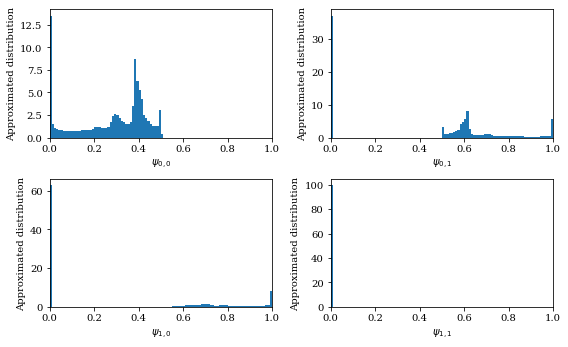

In [44]:
AN.SP.draw_population()
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams['font.size']=10
#plt.savefig('figures/frozen.pdf')
#plt.show()

In [240]:
AN.all_phi

[0.0, 0.0]

In [200]:
AN.SP.phi_s

0.04453638244130016

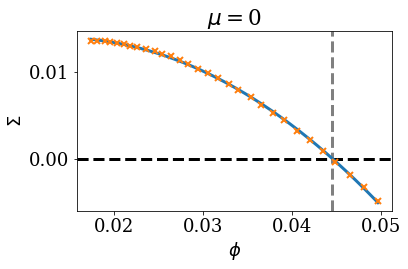

In [63]:
plt.rcParams.update({'backend': 'pdf', 'font.size': 18, 'font.family': 'serif', 'text.latex.preamble': r'\usepackage{gensymb}',  'savefig.format':'pdf', 
                     'lines.linewidth': 3, 'lines.markersize':6, 'lines.markeredgewidth':2, 'figure.constrained_layout.w_pad': 2, 'figure.autolayout' : True})
AN.SP.draw_sigma_phi()
plt.savefig('figures/sigma_phi_+-00')